In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, cross_val_score

In [34]:
data = pd.read_csv('finalMental.csv')

In [35]:
y= data['How will you']
y = np.where(y == 2, 1, y)
y = np.where(y == 3, 2, y)
y = np.where(y == 4, 2, y)
y = np.where(y == 5, 3, y)

data.drop(['Timestamp', 'How will you','What is your Screen-Time? ',
           'What is your Field of Study?','What\'s your gender?','What is the Location type  of your college ? ','How will you rate your alcohol or drugs intake? '],axis=1,inplace=True) 

In [36]:
var = ['Do you experience insomnia? ','Did you ever have any suicidal thoughts?',
           'Do you have a history of mental illness or any traumatic experience?']
arr=[]

for i in var:
    le = LabelEncoder()
    data[i] = le.fit_transform(data[i]) 
    arr.append(le)

In [37]:
arr[0]
x=int(arr[0].transform(["Yes"]))
print(x)

2


In [38]:
import joblib
filename = 'enc.sav'
joblib.dump(arr, filename)


['enc.sav']

In [39]:
X= np.copy(data)
 
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
X,y = shuffle(X,y,random_state=2)

X_train, X_test, y_train,y_test= train_test_split(X,y, test_size = 0.2, random_state = 0)


In [40]:
import xgboost as xgb
xgb_clas = xgb.XGBClassifier(objective= "binary-logistic",learning_rate=0.2,
                            missing= None, max_depth=2,reg_lambda=10)
xgb_clas.fit(X_train,y_train, eval_set=[(X_test,y_test)], early_stopping_rounds= 5, verbose=False) 

[23:37:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\91999\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=10, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [41]:
y_pred = xgb_clas.predict(X_test)
print(y_pred)

[2 2 2 3 2 2 2 2 1 2 2 1 1 2 2 2 2 3 2 2 2 1 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2
 2 2 3 1 3 2 2 2 2 2 2 2 2 3 2 2 3 2 1 2 2 3 2 1 2 2 3 2 1 2 2 2 2 1 2 1 3
 2 2 2 3 2 2 3 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 3 2 2 2 2 1 2 1 2 2 2 2
 1 2 2 2 2 2 3 2 2 2 2 1 2 1 2 2 2]


In [45]:
X_test

array([[21,  3,  2, ...,  1,  3,  1],
       [21,  3,  1, ...,  1,  4,  0],
       [26,  3,  2, ...,  1,  4,  0],
       ...,
       [21,  2,  2, ...,  3,  4,  0],
       [22,  3,  1, ...,  2,  5,  0],
       [19,  2,  1, ...,  1,  3,  0]], dtype=int64)

In [42]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


accuracies = cross_val_score(estimator= xgb_clas,X = X_train, y= y_train, cv=4)
print(accuracies.mean())

              precision    recall  f1-score   support

           1       0.76      0.62      0.68        21
           2       0.85      0.88      0.86        93
           3       0.50      0.50      0.50        14

    accuracy                           0.80       128
   macro avg       0.70      0.67      0.68       128
weighted avg       0.79      0.80      0.79       128

[[13  8  0]
 [ 4 82  7]
 [ 0  7  7]]
[23:37:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if 

c:\users\91999\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\91999\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:37:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\91999\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\91999\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:37:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.7191652312992126


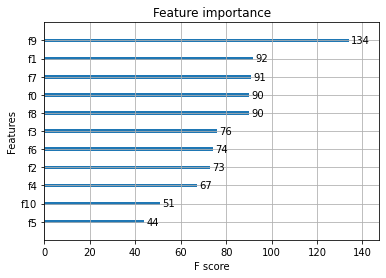

In [43]:
from matplotlib import pyplot
from xgboost import plot_importance
plot_importance(xgb_clas)
pyplot.show()


In [44]:
filename = 'mymodel.sav'
joblib.dump(xgb_clas, filename)

['mymodel.sav']